In [ ]:
# Import libraries
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib_scalebar.scalebar import ScaleBar
import geopandas as gpd
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr

import matplotlib.colors as colors
from matplotlib.patches import Patch
import rasterio


import earthpy as et
import earthpy.plot as ep

from args import *
args = get_main_args()

In [3]:
# load the raster data files
LC = rxr.open_rasterio(args.landcover_dir, masked=True).squeeze()

In [4]:
# Load vector files
east_afr = gpd.read_file(args.east_africa_shp)
south_afr = gpd.read_file(args.south_africa_shp)
north_afr = gpd.read_file(args.north_africa_shp)
west_afr = gpd.read_file(args.west_africa_shp)
central_afr = gpd.read_file(args.central_africa_shp)

In [75]:
# Clip raster layers
EA = LC.rio.clip(east_afr.geometry.apply(mapping))

SA = LC.rio.clip(south_afr.geometry.apply(mapping))

NA = LC.rio.clip(north_afr.geometry.apply(mapping))

WA = LC.rio.clip(west_afr.geometry.apply(mapping))

CA = LC.rio.clip(central_afr.geometry.apply(mapping))


In [76]:
# Define the colors you want
cmap = ListedColormap(["white", "tan", "springgreen", "darkgreen", "yellow", "red", "green"])

# Define a normalization from values -> colors
norm = colors.BoundaryNorm([1, 2, 3, 4, 5, 6, 7], 7)


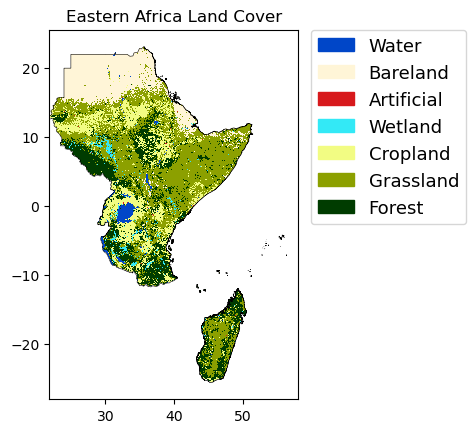

<Figure size 640x480 with 0 Axes>

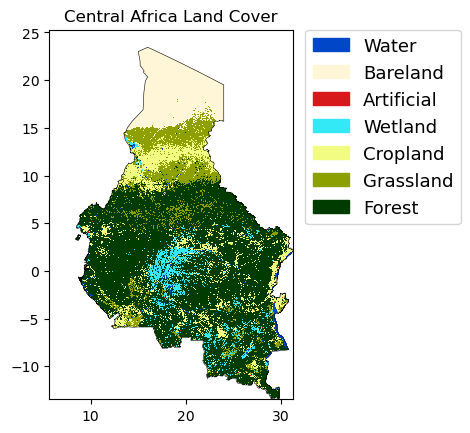

<Figure size 640x480 with 0 Axes>

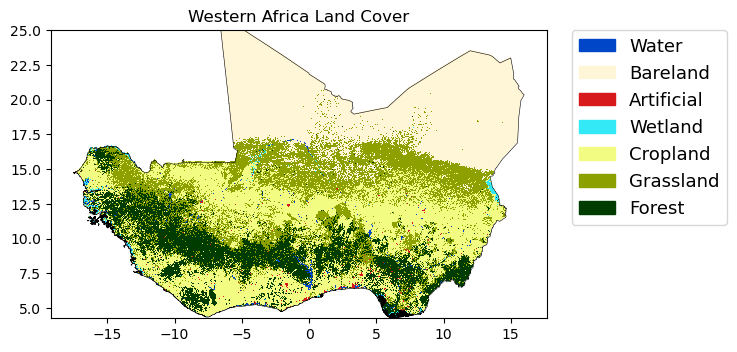

<Figure size 640x480 with 0 Axes>

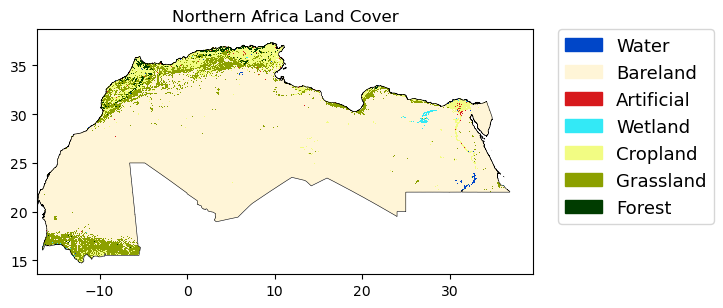

<Figure size 640x480 with 0 Axes>

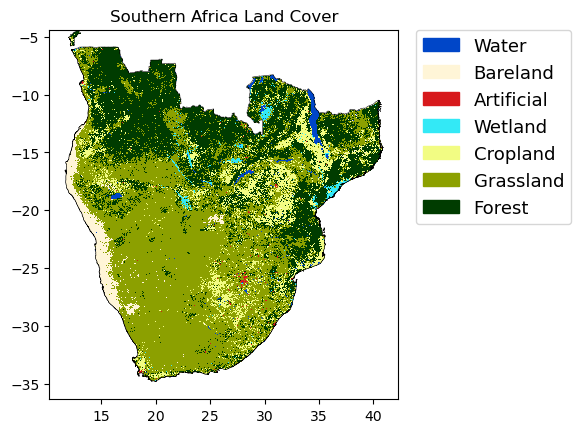

<Figure size 640x480 with 0 Axes>

In [83]:
def Maps (rst, vct, ttl, name, args):

    # Create a list of labels to use for your legend
    height_class_labels = ["Water", "Bareland", "Artificial", "Wetland", "Cropland", "Grassland", "Forest"]

    # Create a colormap from a list of colors
    colors = ["#0046c8", "#fff5d7",  "#d7191c", "#33e9f6",  "#f2fc83",  "#8ca000",  "#003c00"]

    cmap = ListedColormap(colors)

    # class_bins = [.5, 1.5, 2.5, 3.5, 4.5]
    # norm = BoundaryNorm(class_bins,
    #                     len(colors))

    # Plot newly classified and masked raster
    f, ax = plt.subplots()
    im = rst.plot.imshow(cmap=cmap, add_colorbar=False)
    vct.geometry.boundary.plot(color=None,edgecolor='k',linewidth = .4,ax=ax)
    # Add legend using earthpy
    ep.draw_legend(im,
                   titles=height_class_labels)
    ax.set(title=ttl)
    # ax.set_axis_off()
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    plt.show()
    plt.tight_layout()
    
    # Export the images
    outpath = args.landcover_mapographics_dir
    path = os.path.join(os.path.join(outpath, name + '.svg'))
    f.savefig(path, format = 'svg', dpi=1200, bbox_inches='tight')
    
# Call the function
Maps(EA, east_afr, "Eastern Africa Land Cover", "Eastern Land Cover")
Maps(CA, central_afr, "Central Africa Land Cover", "Central Land Cover")
Maps(WA, west_afr, "Western Africa Land Cover", "Western Land Cover")
Maps(NA, north_afr, "Northern Africa Land Cover", "Northern Land Cover")
Maps(SA, south_afr, "Southern Africa Land Cover", "Southern Land Cover")

In [1]:
# # Write to file
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from shapely.geometry import mapping
# import rioxarray as rxr
# import xarray as xr
# import geopandas as gpd

# import earthpy as et
# import earthpy.plot as ep

# outpath = r'D:/OSS_2/Scripts/Maps'
# path_to_tif_file = os.path.join(outpath, "SouthernAfrica.tif")

# # Write the data to a new geotiff file
# SA.rio.to_raster(path_to_tif_file)

In [3]:
!pip freeze > requirements.txt